In [120]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt


In [7]:
url2="https://www.alphavantage.co/query"
params={
    "function":"TIME_SERIES_DAILY",
    "symbol":"HDFCBANK.BSE",
    "apikey":"WKDGTW9RPXRDVAKU",
    "outputsize":"600"
}
data=requests.get(url2,params=params).json()


In [8]:
def Get_Daily_Data(Stock_Symbol,Output_Size="full"):
    params={
        "function":"TIME_SERIES_DAILY",
        "symbol":Stock_Symbol,
        "apikey":"WKDGTW9RPXRDVAKU",
        "outputsize":Output_Size
    }
    search_url="https://www.alphavantage.co/query"
    data=requests.get(search_url,params=params).json()
    MetaData=data['Meta Data'].values()
    return pd.DataFrame(data["Time Series (Daily)"]),MetaData

def Find_Stock(Stock_Name):
    search_url="https://www.alphavantage.co/query"
    search_params={
        "function":"SYMBOL_SEARCH",
        "keywords":Stock_Name,
        "apikey":"WKDGTW9RPXRDVAKU",
    }
    search_results=requests.get(search_url,params=search_params).json()
    print(search_results)
    # if (len(search_results['bestMatches'])==0):
    #     return None 
    [print(i+1,"Symbol:",search_results['bestMatches'][i]['1. symbol'],"\tName: ",search_results['bestMatches'][i]['2. name'],"\tRegion: ",search_results['bestMatches'][i]['4. region']) for i in range(0,len(search_results['bestMatches']))]
    
    index=int(input("Select a Stock: "))
    return search_results['bestMatches'][index-1]['1. symbol']




In [6]:
Find_Stock("Vodafone Idea Ltd")

{'bestMatches': [{'1. symbol': 'IDEA.BSE', '2. name': 'Vodafone Idea Ltd', '3. type': 'Equity', '4. region': 'India/Bombay', '5. marketOpen': '09:15', '6. marketClose': '15:30', '7. timezone': 'UTC+5.5', '8. currency': 'INR', '9. matchScore': '1.0000'}]}
1 Symbol: IDEA.BSE 	Name:  Vodafone Idea Ltd 	Region:  India/Bombay


KeyboardInterrupt: Interrupted by user

In [9]:
df=Get_Daily_Data("IDEA.BSE")

In [10]:
df

(          2024-06-21 2024-06-20 2024-06-19 2024-06-18 2024-06-14 2024-06-13  \
 1. open      16.6200    16.9900    17.0000    16.9800    16.0800    16.7300   
 2. high      17.2800    16.9900    17.4000    17.0000    16.8500    16.7300   
 3. low       16.5300    16.4600    16.3500    16.4800    16.0500    16.0000   
 4. close     17.1400    16.5300    16.9200    16.8600    16.7300    16.0700   
 5. volume  131283069   48968760  146503000   84189370  132163600   82040860   
 
           2024-06-12 2024-06-11 2024-06-10 2024-06-07  ... 2007-03-22  \
 1. open      16.3500    15.9100    15.9400    15.0400  ...    93.5000   
 2. high      16.7000    16.3100    16.3500    16.0400  ...    96.7500   
 3. low       16.2100    15.6100    15.7500    14.9000  ...    93.2000   
 4. close     16.4400    16.2000    15.8100    15.8500  ...    96.2000   
 5. volume  104995700  136992200  137976900  233032000  ...    8273858   
 
           2007-03-21 2007-03-20 2007-03-19 2007-03-16 2007-03-15 2007-0

In [16]:
df , columns=df

In [26]:
df=df.transpose()

In [31]:
df['1. open']=df['1. open'].astype('float')

<Axes: >

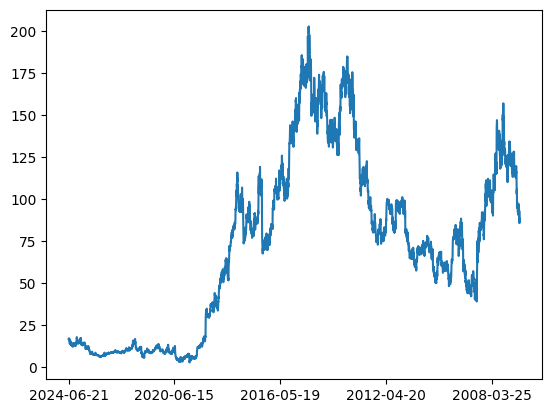

In [40]:
df['1. open'].plot()

In [55]:
df.iloc[0:200,0].values

200

In [54]:
df.iloc[199,0]

8.92

In [64]:
X=[]

In [79]:
X=[]
Y=[]
for i in range(4261-200-1):
    X.append(df.iloc[i:i+200,0].values)
    Y.append(df.iloc[i+200,0])


In [80]:
X

[array([16.62, 16.99, 17.  , 16.98, 16.08, 16.73, 16.35, 15.91, 15.94,
        15.04, 15.1 , 13.75, 15.74, 16.31, 14.78, 14.88, 14.49, 15.03,
        15.2 , 14.23, 13.5 , 13.63, 13.52, 13.29, 13.07, 13.23, 13.33,
        12.67, 12.64, 12.71, 12.8 , 12.45, 12.83, 13.25, 13.33, 13.25,
        13.5 , 14.06, 13.68, 12.  , 13.73, 12.99, 12.4 , 12.94, 13.08,
        12.9 , 12.95, 12.72, 12.8 , 13.18, 13.99, 13.36, 14.  , 13.23,
        13.95, 13.32, 13.33, 13.31, 13.4 , 12.82, 12.85, 12.82, 13.12,
        13.23, 13.13, 12.39, 13.69, 13.82, 14.29, 14.15, 14.37, 14.25,
        14.61, 13.9 , 13.69, 15.76, 17.01, 17.74, 16.67, 15.5 , 16.1 ,
        16.09, 15.97, 16.02, 15.63, 14.59, 14.52, 15.6 , 14.92, 15.12,
        14.43, 13.74, 14.07, 14.29, 14.4 , 14.52, 14.76, 14.74, 14.91,
        14.4 , 15.09, 15.08, 15.1 , 15.19, 15.22, 15.6 , 16.5 , 15.92,
        16.11, 16.23, 16.27, 17.25, 17.25, 17.1 , 15.9 , 15.89, 17.09,
        16.24, 13.41, 13.49, 13.4 , 13.67, 13.72, 13.18, 14.04, 14.16,
      

In [81]:
Y

[9.02,
 8.88,
 8.03,
 7.85,
 7.8,
 7.58,
 7.63,
 7.74,
 7.75,
 7.97,
 8.1,
 8.09,
 8.18,
 8.3,
 8.4,
 8.28,
 7.91,
 7.95,
 8.25,
 8.35,
 8.33,
 8.52,
 9.06,
 8.0,
 7.95,
 7.94,
 7.56,
 7.69,
 7.67,
 7.6,
 7.38,
 7.27,
 7.37,
 7.38,
 7.38,
 7.45,
 7.46,
 7.43,
 7.49,
 7.59,
 7.46,
 7.43,
 7.53,
 7.57,
 7.62,
 7.48,
 7.5,
 7.71,
 7.42,
 7.59,
 7.79,
 7.83,
 7.91,
 8.48,
 7.6,
 7.37,
 7.44,
 7.77,
 7.05,
 7.12,
 7.18,
 7.17,
 7.15,
 7.12,
 7.13,
 7.08,
 7.14,
 6.93,
 6.92,
 7.02,
 7.03,
 7.05,
 7.05,
 7.25,
 7.09,
 7.02,
 7.08,
 6.77,
 6.82,
 6.92,
 6.92,
 6.95,
 6.91,
 6.9,
 6.97,
 6.92,
 6.59,
 6.33,
 6.37,
 6.48,
 6.15,
 6.08,
 6.09,
 6.07,
 6.09,
 6.18,
 6.1,
 6.17,
 6.25,
 6.21,
 6.14,
 6.15,
 5.82,
 5.89,
 5.92,
 6.04,
 6.27,
 6.4,
 6.53,
 6.33,
 6.36,
 6.42,
 6.46,
 6.4,
 6.57,
 6.62,
 6.76,
 6.82,
 6.93,
 6.92,
 6.92,
 6.98,
 6.9,
 6.79,
 6.68,
 6.81,
 6.73,
 6.99,
 6.99,
 6.97,
 7.18,
 7.47,
 7.7,
 7.71,
 7.85,
 7.85,
 7.79,
 7.9,
 8.05,
 8.51,
 7.57,
 6.81,
 6.7,
 7.17,
 6.88,
 

In [82]:
X=np.array(X)
Y=np.array(Y)

In [99]:
"a"+1

TypeError: can only concatenate str (not "int") to str

In [102]:
column_Names=["X"+str(i) for i in range(200)]
column_Names.append("Y")

In [118]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)

In [126]:
Scaler_Y=StandardScaler()
Y=Scaler_Y.fit_transform(Y)

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y.reshape(4060,),test_size=(0.8),shuffle=False)

In [136]:
Y_train

array([-1.27137388, -1.27409035, -1.29058321, -1.29407582, -1.29504598,
       -1.29931472, -1.29834456, -1.29621019, -1.29601615, -1.29174741,
       -1.28922498, -1.28941901, -1.28767271, -1.2853443 , -1.28340397,
       -1.28573237, -1.29291161, -1.29213548, -1.28631447, -1.28437413,
       -1.2847622 , -1.28107556, -1.27059775, -1.29116531, -1.29213548,
       -1.29232951, -1.29970279, -1.29718035, -1.29756842, -1.29892666,
       -1.3031954 , -1.30532977, -1.30338943, -1.3031954 , -1.3031954 ,
       -1.30183716, -1.30164313, -1.30222523, -1.30106103, -1.29912069,
       -1.30164313, -1.30222523, -1.30028489, -1.29950876, -1.29853859,
       -1.30125506, -1.30086699, -1.29679229, -1.30241926, -1.29912069,
       -1.29524002, -1.29446388, -1.29291161, -1.2818517 , -1.29892666,
       -1.30338943, -1.3020312 , -1.29562809, -1.30959851, -1.30824027,
       -1.30707607, -1.3072701 , -1.30765817, -1.30824027, -1.30804624,
       -1.30901641, -1.3078522 , -1.31192691, -1.31212094, -1.31

In [151]:
from sklearn import svm
model = svm.SVR(kernel='rbf')
model.fit(X_train,Y_train)

SVR()

In [152]:
from sklearn.metrics import r2_score
preds=model.predict(X_test)
model.score(X_test,Y_test)

-3.208073399333581